In [128]:
%matplotlib inline

In [129]:
"""
Plot learning curve.
"""

import matplotlib.pyplot as plt
import numpy as np
import argparse
from glob import glob

def plot_acc(path_list, legends=None, model_name=None, ylim=None, x_max=None, figsize=(16, 12)):  # train loss, train acc, loss, acc
    plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['font.size'] = 24
    
    if legends is None:
        legend_list = [pp.replace("./log/", "").replace("/statistics.npz", "").replace("/progress-150-acc.npz", "") for pp in path_list]
    else:
        legend_list = legends
    
    fig = plt.figure(0, figsize=figsize)
    plt.subplot(2, 1, 1)
    plt.title(model_name)
    for i, l in zip(path_list, legend_list):
        acc = np.load(i)
        print(acc["loss"][-1, -1])
        plt.plot(acc["loss"][:, -1], label=l)
#     plt.ylim(ymin=0.4)
    if ylim is not None:
        plt.ylim(ylim)
#     plt.legend(loc="best", fontsize=18)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.subplots_adjust(right=0.7)
    plt.grid()
    plt.xlim(xmin=0)
    if x_max is not None:
        plt.xlim(xmax=x_max)
    plt.ylabel("Validation accuracy")
#     plt.xlabel("Epoch")
    
    plt.subplot(2, 1, 2)
    for i, l in zip(path_list, legend_list):
        acc = np.load(i)
        plt.plot(acc["loss"][:, 1], label=l)
#     plt.ylim(ymin=0.4)
#     plt.legend(loc="best", fontsize=18)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)
    plt.subplots_adjust(right=0.7)
    plt.grid()
    plt.xlim(xmin=0)
    if x_max is not None:
        plt.xlim(xmax=x_max)
    plt.ylabel("Training accuracy")
    plt.xlabel("Epoch")

In [130]:
# model = "cnn_gap"
model = "cnn"
_list = np.array(glob("./log/%s*/*/statistics.npz" % model))
_list

array(['./log/cnn_char/l0.000100_e500_b100/statistics.npz',
       './log/cnn_char/l0.000100_e500_b300_n0.990/statistics.npz',
       './log/cnn_char/l0.000100_e500_b500_n0.900/statistics.npz',
       './log/cnn_char/l0.000100_e500_b100_n0.950_k0.80/statistics.npz',
       './log/cnn_char/l0.000100_e500_b100_n0.950/statistics.npz',
       './log/cnn_char/l0.000100_e500_b100_c1.00/statistics.npz',
       './log/cnn_char/l0.000100_e500_b100_k0.80/statistics.npz',
       './log/cnn_gap/l0.000100_e500_b100/statistics.npz',
       './log/cnn_gap/l0.000100_e500_b100_k0.80/statistics.npz'],
      dtype='<U62')

0.766923
0.672439
0.770962
0.819423
0.735
0.769231


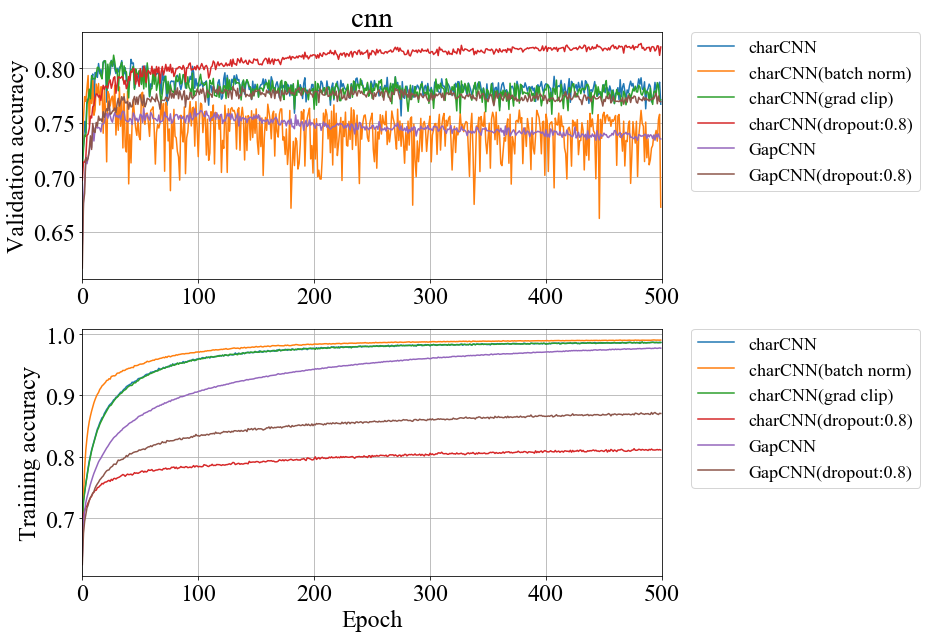

In [120]:
legends = ["charCNN", "charCNN(batch norm)", "charCNN(grad clip)", "charCNN(dropout:0.8)", "GapCNN", "GapCNN(dropout:0.8)"]
plot_acc(_list[[0, 2, 5, 6, 7, 8]], legends=legends, model_name=model, x_max=500, figsize=(14, 10))
# plot_acc(_list, model_name=model, x_max=500, figsize=(14, 10))
plt.savefig("./img/%s.png" % model, bbox_inches="tight")
plt.show()

In [132]:
model = "lstm"
_list = np.array(glob("./log/%s*/*/statistics.npz" % model))
# _list = np.array(glob("./log/%s*/*/progress-400-acc.npz" % model))
_list

array(['./log/lstm_char/l0.000100_e500_b300_n0.950_k0.80/statistics.npz',
       './log/lstm_char/l0.000100_e500_b100/statistics.npz',
       './log/lstm_char/l0.000100_e500_b100_k0.80/statistics.npz',
       './log/lstm/l0.000100_e500_b100/statistics.npz',
       './log/lstm/l0.000100_e500_b100_k0.80/statistics.npz'],
      dtype='<U63')

0.775769
0.821731
0.780577
0.815577


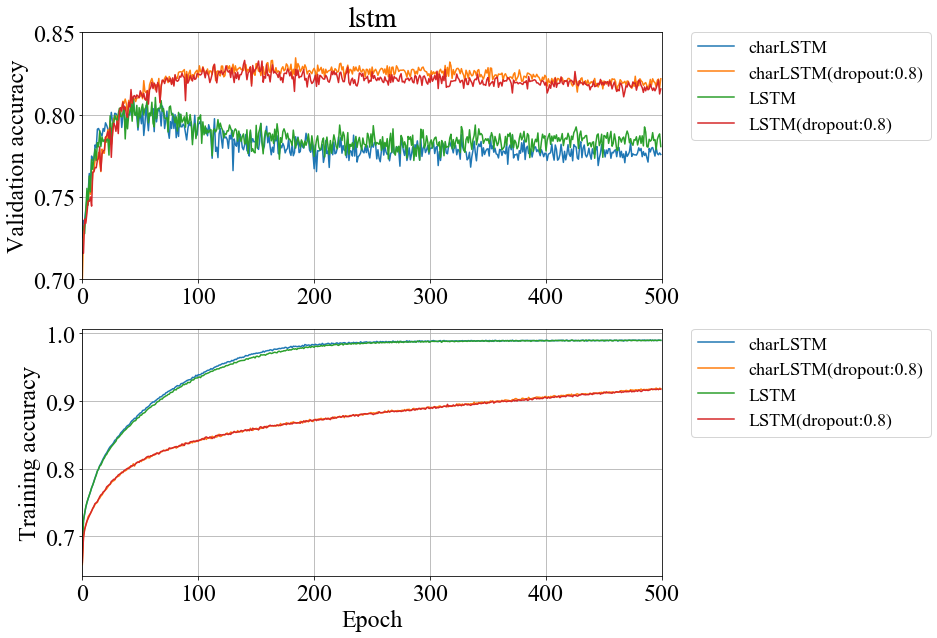

In [134]:
# plot_acc(_list[[0, 2, 4]])
legends = ["charLSTM", "charLSTM(dropout:0.8)", "LSTM", "LSTM(dropout:0.8)"]
plot_acc(_list[[1, 2, 3, 4]], legends=legends, model_name=model, figsize=(14, 10), ylim=[0.7, 0.85], x_max=500)
plt.savefig("./img/%s.png" % model, bbox_inches="tight")
plt.show()